# Titanic survival prediction.

In [49]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [50]:
%matplotlib inline

In [51]:
data_frame=pd.read_csv('titanic.csv')
data_frame.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [52]:
#handling null values.
data_frame.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


<AxesSubplot:>

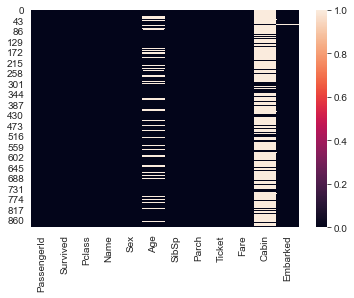

In [53]:
#visualizing null values using heatmap.
sns.heatmap(data_frame.isnull())

In [54]:
#finding total number of null values in each column
data_frame.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:xlabel='Survived', ylabel='count'>

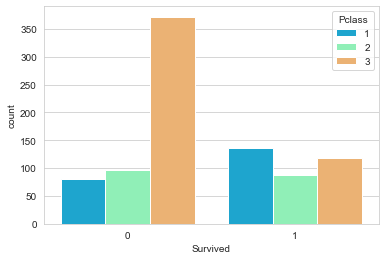

In [55]:
#understanding the class using survived.
sns.set_style(style='whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=data_frame,palette='rainbow')

<AxesSubplot:xlabel='Survived', ylabel='count'>

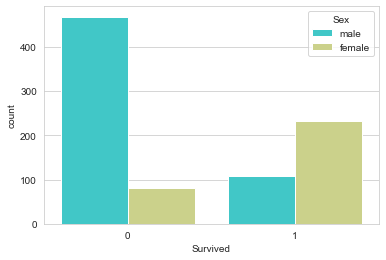

In [56]:
sns.countplot(x='Survived',hue='Sex',data=data_frame,palette='rainbow')

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age'>

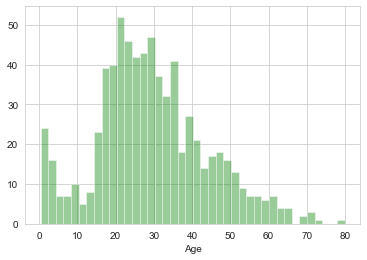

In [57]:
sns.distplot(data_frame['Age'].dropna(),kde=False,color='green',bins=40)

<AxesSubplot:xlabel='SibSp', ylabel='count'>

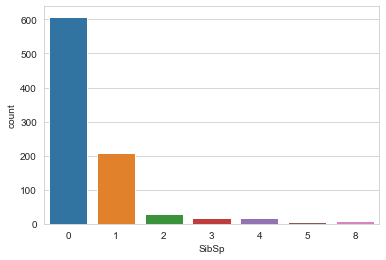

In [58]:
sns.countplot(x=data_frame['SibSp'])

<AxesSubplot:>

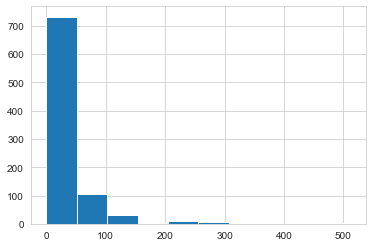

In [59]:
data_frame['Fare'].hist()

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Pclass', ylabel='Age'>

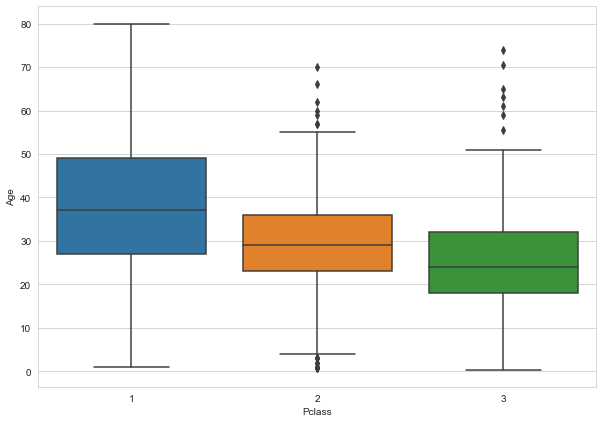

In [60]:
#checking out the outliers.
plt.figure(figsize=(10,7))
sns.boxplot(data_frame['Pclass'],data_frame['Age'])

In [61]:
#imputing the pclass using age.
def impute_age(cols):
    pclass=cols[0]
    age=cols[1]
    if pd.isnull(age):
        if pclass==1:
            return 37
        elif pclass==2:
            return 28
        else:
            return 24
    else:
        return age

In [62]:
data_frame['Age']=data_frame[['Pclass','Age']].apply(impute_age,axis=1)

<AxesSubplot:>

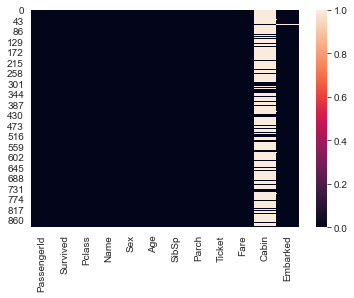

In [63]:
#checking out the null values using heatmap.
sns.heatmap(data_frame.isnull())

In [64]:
#dropping 'Cabin' feature from the dataframe.
data_frame.drop(['Cabin'],axis=1,inplace=True)

In [65]:
#dropping the null values in dataframe.
data_frame.dropna(inplace=True)

In [66]:
#checking out the dtype and null counts using data_frame.info()
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


In [67]:
data_frame.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [68]:
#drop sibsp,parch,fare,embarked,class,who,adult_male,embark_town

In [69]:
#dropping the unwanted columns.
data_frame.drop(['SibSp','Parch','Name','PassengerId','Embarked','Ticket'],axis=1,inplace=True)

In [70]:
data_frame.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500


In [72]:
#getting dummies for pclass
pclass=pd.get_dummies(data_frame['Pclass'],drop_first=True)

In [73]:
pclass

,2,3
0,0,1
1,0,0
2,0,1
3,0,0
4,0,1
...,...,...
886,1,0
887,0,0
888,0,1
889,0,0


In [75]:
#getting dummies for sex feature.
sex=pd.get_dummies(data_frame['Sex'],drop_first=True)

In [76]:
sex

,male
0,1
1,0
2,0
3,0
4,1
...,...
886,1
887,0
888,0
889,1


In [77]:
#concatinating the data
df=pd.concat([data_frame,sex,pclass],axis=1)

In [78]:
df.head()

,Survived,Pclass,Sex,Age,Fare,male,2,3
0,0,3,male,22.0,7.2500,1,0,1
1,1,1,female,38.0,71.2833,0,0,0
2,1,3,female,26.0,7.9250,0,0,1
3,1,1,female,35.0,53.1000,0,0,0
4,0,3,male,35.0,8.0500,1,0,1


In [79]:
df.drop(['Sex','Pclass'],axis=1,inplace=True)

In [80]:
df.head()

,Survived,Age,Fare,male,2,3
0,0,22.0,7.2500,1,0,1
1,1,38.0,71.2833,0,0,0
2,1,26.0,7.9250,0,0,1
3,1,35.0,53.1000,0,0,0
4,0,35.0,8.0500,1,0,1


In [85]:
#assigning the input and output features.
x=df.drop(['Survived'],axis=1)
y=df['Survived']
x.head()

,Age,Fare,male,2,3
0,22.0,7.2500,1,0,1
1,38.0,71.2833,0,0,0
2,26.0,7.9250,0,0,1
3,35.0,53.1000,0,0,0
4,35.0,8.0500,1,0,1


In [81]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [86]:
model=LogisticRegression()
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [87]:
model.fit(x_train,y_train)

LogisticRegression()

In [88]:
model.score(x_test,y_test)

0.7790262172284644